# Option Volatility Analysis - NSE Stocks (July 25, 2025)

This notebook analyzes the option volatility data for NSE stocks, comparing underlying and futures volatility patterns to provide market insights and risk analysis.

## Dataset Overview
- **Date**: July 25, 2025
- **Market**: National Stock Exchange (NSE) of India
- **Data Type**: Daily volatility calculations for underlying stocks and futures
- **Key Metrics**: Log returns, daily volatility, annualized volatility

## Analysis Goals
1. Understand volatility distribution across stocks
2. Compare underlying vs futures volatility
3. Identify high-risk and low-risk securities
4. Provide actionable trading insights
5. Analyze market risk patterns

## 1. Import Required Libraries

In [3]:
#!pip install scikit-learn
# Core data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📊 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
📊 Analysis Date: 2025-07-25 22:59:07


## 2. Load and Explore the Data

In [4]:
# Load the volatility data
file_path = '../data/FOVOLT_25072025.csv'

try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print("\n" + "="*60)
    
    # Display basic information
    print("📋 Dataset Information:")
    print(f"   • Number of stocks: {df.shape[0]}")
    print(f"   • Number of columns: {df.shape[1]}")
    print(f"   • Data date: {df['Date'].iloc[0] if 'Date' in df.columns else 'N/A'}")
    
    # Show first few rows
    print("\n🔍 First 5 rows:")
    display(df.head())
    
    # Show column names
    print("\n📊 Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

✅ Data loaded successfully!
📊 Dataset shape: (233, 16)

📋 Dataset Information:
   • Number of stocks: 233
   • Number of columns: 16
   • Data date: 25-Jul-25

🔍 First 5 rows:


,Date,Symbol,Underlying Close Price (A),Underlying Previous Day Close Price (B),Underlying Log Returns (C) = LN(A/B),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E) = Sqrt (0.995*D*D + 0.005* C*C),Underlying Annualised Volatility (F) = E*sqrt(365),Futures Close Price (G),Futures Previous Day Close Price (H),Futures Log Returns (I) = LN(G/H),Previous Day Futures Volatility (J),Current Day Futures Daily Volatility (K) = Sqrt (0.995*J*J + 0.005* I*I),Futures Annualised Volatility (L) = K*sqrt(365),Applicable Daily Volatility (M) = Max (E or K),Applicable Annualised Volatility (N) = Max (F or L)
0,25-Jul-25,360ONE,1077.90,1118.60,-0.0371,0.0261,0.0262,0.4998,1080.4,1122.70,-0.0384,0.0261,0.0262,0.5000,0.0262,0.5000
1,25-Jul-25,AARTIIND,430.25,433.70,-0.0080,0.0229,0.0228,0.4360,429.8,433.95,-0.0096,0.0231,0.0231,0.4405,0.0231,0.4405
2,25-Jul-25,ABB,5643.00,5699.00,-0.0099,0.0210,0.0210,0.4011,5640.5,5709.00,-0.0121,0.0208,0.0208,0.3972,0.0210,0.4011
3,25-Jul-25,ABCAPITAL,260.35,270.95,-0.0399,0.0209,0.0211,0.4022,260.0,271.15,-0.0420,0.0210,0.0211,0.4038,0.0211,0.4038
4,25-Jul-25,ABFRL,73.77,75.67,-0.0254,0.0227,0.0227,0.4342,73.6,75.65,-0.0275,0.0228,0.0228,0.4356,0.0228,0.4356



📊 Column Names:
 1. Date
 2.  Symbol
 3.  Underlying Close Price (A)
 4.  Underlying Previous Day Close Price (B)
 5.  Underlying Log Returns (C) = LN(A/B)
 6.  Previous Day Underlying Volatility (D)
 7.  Current Day Underlying Daily Volatility (E) = Sqrt (0.995*D*D + 0.005* C*C)
 8.  Underlying Annualised Volatility (F) = E*sqrt(365)
 9.  Futures Close Price (G)
10.  Futures Previous Day Close Price (H)
11.  Futures Log Returns (I) = LN(G/H)
12.  Previous Day Futures Volatility (J)
13.  Current Day Futures Daily Volatility (K) = Sqrt (0.995*J*J + 0.005* I*I)
14.  Futures Annualised Volatility (L) = K*sqrt(365)
15.  Applicable Daily Volatility (M) = Max (E or K)
16.  Applicable Annualised Volatility (N) = Max (F or L)


## 3. Data Cleaning and Preprocessing

In [5]:
# Clean column names and create a more manageable structure
# Define clean column names based on the data description
clean_columns = {
    'Date': 'date',
    ' Symbol': 'symbol',
    ' Underlying Close Price (A)': 'underlying_close',
    ' Underlying Previous Day Close Price (B)': 'underlying_prev_close',
    ' Underlying Log Returns (C) = LN(A/B)': 'underlying_log_returns',
    ' Previous Day Underlying Volatility (D)': 'underlying_prev_volatility',
    ' Current Day Underlying Daily Volatility (E) = Sqrt (0.995*D*D + 0.005* C*C)': 'underlying_daily_volatility',
    ' Underlying Annualised Volatility (F) = E*sqrt(365)': 'underlying_annual_volatility',
    ' Futures Close Price (G)': 'futures_close',
    ' Futures Previous Day Close Price (H)': 'futures_prev_close',
    ' Futures Log Returns (I) = LN(G/H)': 'futures_log_returns',
    ' Previous Day Futures Volatility (J)': 'futures_prev_volatility',
    ' Current Day Futures Daily Volatility (K) = Sqrt (0.995*J*J + 0.005* I*I)': 'futures_daily_volatility',
    ' Futures Annualised Volatility (L) = K*sqrt(365)': 'futures_annual_volatility',
    ' Applicable Daily Volatility (M) = Max (E or K)': 'applicable_daily_volatility',
    ' Applicable Annualised Volatility (N) = Max (F or L)': 'applicable_annual_volatility'
}

# Rename columns
df_clean = df.rename(columns=clean_columns)

# Convert date column
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d-%b-%y')

# Clean symbol column (remove leading/trailing spaces)
df_clean['symbol'] = df_clean['symbol'].str.strip()

# Convert numeric columns
numeric_columns = [col for col in df_clean.columns if col not in ['date', 'symbol']]
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check for missing values
print("🧹 Data Cleaning Summary:")
print(f"   • Original columns: {len(df.columns)}")
print(f"   • Cleaned columns: {len(df_clean.columns)}")
print(f"   • Missing values: {df_clean.isnull().sum().sum()}")

# Display cleaned data info
print("\n📊 Cleaned Dataset Info:")
print(df_clean.info())

print("\n✅ Data cleaning completed!")
print("\n🔍 Sample of cleaned data:")
display(df_clean.head())

🧹 Data Cleaning Summary:
   • Original columns: 16
   • Cleaned columns: 16
   • Missing values: 0

📊 Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          233 non-null    datetime64[ns]
 1   symbol                        233 non-null    object        
 2   underlying_close              233 non-null    float64       
 3   underlying_prev_close         233 non-null    float64       
 4   underlying_log_returns        233 non-null    float64       
 5   underlying_prev_volatility    233 non-null    float64       
 6   underlying_daily_volatility   233 non-null    float64       
 7   underlying_annual_volatility  233 non-null    float64       
 8   futures_close                 233 non-null    float64       
 9   futures_prev_close            233 non-nu

,date,symbol,underlying_close,underlying_prev_close,underlying_log_returns,underlying_prev_volatility,underlying_daily_volatility,underlying_annual_volatility,futures_close,futures_prev_close,futures_log_returns,futures_prev_volatility,futures_daily_volatility,futures_annual_volatility,applicable_daily_volatility,applicable_annual_volatility
0,2025-07-25,360ONE,1077.90,1118.60,-0.0371,0.0261,0.0262,0.4998,1080.4,1122.70,-0.0384,0.0261,0.0262,0.5000,0.0262,0.5000
1,2025-07-25,AARTIIND,430.25,433.70,-0.0080,0.0229,0.0228,0.4360,429.8,433.95,-0.0096,0.0231,0.0231,0.4405,0.0231,0.4405
2,2025-07-25,ABB,5643.00,5699.00,-0.0099,0.0210,0.0210,0.4011,5640.5,5709.00,-0.0121,0.0208,0.0208,0.3972,0.0210,0.4011
3,2025-07-25,ABCAPITAL,260.35,270.95,-0.0399,0.0209,0.0211,0.4022,260.0,271.15,-0.0420,0.0210,0.0211,0.4038,0.0211,0.4038
4,2025-07-25,ABFRL,73.77,75.67,-0.0254,0.0227,0.0227,0.4342,73.6,75.65,-0.0275,0.0228,0.0228,0.4356,0.0228,0.4356


## 4. Calculate Basic Statistics

In [6]:
# Calculate comprehensive statistics for key volatility measures
volatility_columns = [
    'underlying_daily_volatility', 'underlying_annual_volatility',
    'futures_daily_volatility', 'futures_annual_volatility',
    'applicable_daily_volatility', 'applicable_annual_volatility'
]

print("📊 VOLATILITY STATISTICS SUMMARY")
print("=" * 80)

# Basic descriptive statistics
stats_summary = df_clean[volatility_columns].describe()
print("\n📈 Descriptive Statistics:")
display(stats_summary.round(4))

# Additional statistics
print("\n📊 Additional Statistics:")
additional_stats = pd.DataFrame({
    'Coefficient of Variation': df_clean[volatility_columns].std() / df_clean[volatility_columns].mean(),
    'Skewness': df_clean[volatility_columns].skew(),
    'Kurtosis': df_clean[volatility_columns].kurtosis()
}).round(4)

display(additional_stats)

# Price statistics
price_columns = ['underlying_close', 'futures_close']
print("\n💰 Price Statistics:")
price_stats = df_clean[price_columns].describe()
display(price_stats.round(2))

# Log returns statistics
returns_columns = ['underlying_log_returns', 'futures_log_returns']
print("\n📉 Log Returns Statistics:")
returns_stats = df_clean[returns_columns].describe()
display(returns_stats.round(6))

print("\n✅ Statistical analysis completed!")

📊 VOLATILITY STATISTICS SUMMARY

📈 Descriptive Statistics:


,underlying_daily_volatility,underlying_annual_volatility,futures_daily_volatility,futures_annual_volatility,applicable_daily_volatility,applicable_annual_volatility
count,233.0000,233.0000,233.0000,233.0000,233.0000,233.0000
mean,0.0206,0.3930,0.0206,0.3927,0.0207,0.3948
std,0.0057,0.1081,0.0057,0.1096,0.0057,0.1087
min,0.0085,0.1621,0.0081,0.1557,0.0085,0.1621
25%,0.0165,0.3145,0.0163,0.3112,0.0165,0.3148
50%,0.0204,0.3895,0.0202,0.3866,0.0205,0.3911
75%,0.0239,0.4575,0.0239,0.4564,0.0240,0.4577
max,0.0354,0.6762,0.0352,0.6722,0.0354,0.6762



📊 Additional Statistics:


,Coefficient of Variation,Skewness,Kurtosis
underlying_daily_volatility,0.2751,0.3030,-0.2142
underlying_annual_volatility,0.2750,0.3011,-0.2143
futures_daily_volatility,0.2791,0.2826,-0.2666
futures_annual_volatility,0.2792,0.2838,-0.2655
applicable_daily_volatility,0.2754,0.2990,-0.2365
applicable_annual_volatility,0.2754,0.2974,-0.2364



💰 Price Statistics:


,underlying_close,futures_close
count,233.00,233.00
mean,3944.37,3944.14
std,10503.26,10503.94
min,7.20,7.21
25%,395.80,395.75
50%,1077.90,1080.40
75%,2603.40,2601.40
max,81463.09,81530.70



📉 Log Returns Statistics:


,underlying_log_returns,futures_log_returns
count,233.000000,233.000000
mean,-0.015391,-0.016521
std,0.017260,0.017188
min,-0.088900,-0.091700
25%,-0.025300,-0.027000
50%,-0.015700,-0.016400
75%,-0.006700,-0.007900
max,0.091600,0.085900



✅ Statistical analysis completed!


## 5. Volatility Distribution Analysis

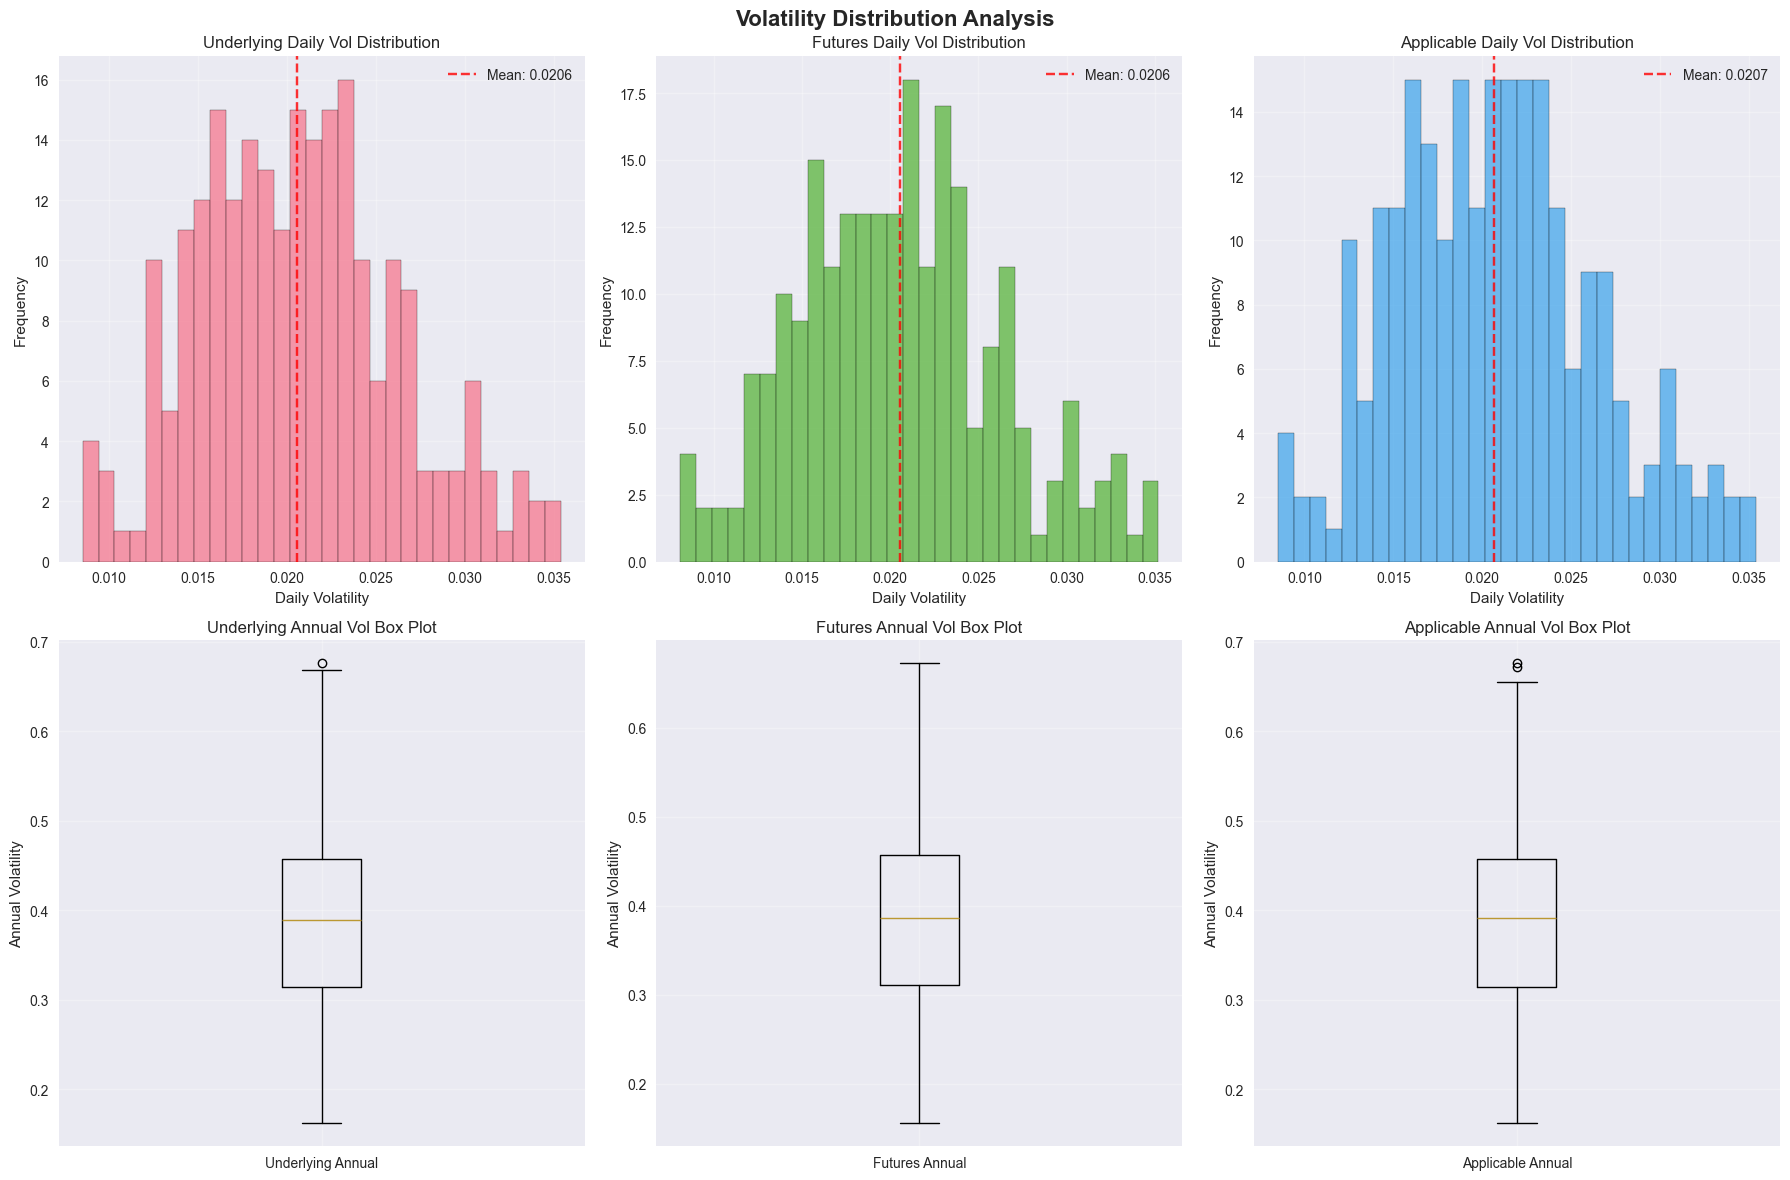

📊 Volatility distribution analysis completed!

🎯 Key Observations:
   • Highest daily volatility: 0.0354
   • Lowest daily volatility: 0.0085
   • Average daily volatility: 0.0207
   • Volatility standard deviation: 0.0057


In [7]:
# Create comprehensive volatility distribution visualizations
#pip install nbformat
# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Volatility Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram plots
volatility_data = {
    'Underlying Daily Vol': df_clean['underlying_daily_volatility'],
    'Futures Daily Vol': df_clean['futures_daily_volatility'],
    'Applicable Daily Vol': df_clean['applicable_daily_volatility']
}

for i, (title, data) in enumerate(volatility_data.items()):
    axes[0, i].hist(data, bins=30, alpha=0.7, color=sns.color_palette("husl", 3)[i], edgecolor='black')
    axes[0, i].set_title(f'{title} Distribution')
    axes[0, i].set_xlabel('Daily Volatility')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = data.mean()
    std_val = data.std()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.4f}')
    axes[0, i].legend()

# Box plots for annual volatility
annual_volatility_data = {
    'Underlying Annual Vol': df_clean['underlying_annual_volatility'],
    'Futures Annual Vol': df_clean['futures_annual_volatility'],
    'Applicable Annual Vol': df_clean['applicable_annual_volatility']
}

box_data = [data for data in annual_volatility_data.values()]
box_labels = list(annual_volatility_data.keys())

for i in range(3):
    axes[1, i].boxplot(box_data[i], labels=[box_labels[i].replace(' Vol', '')])
    axes[1, i].set_title(f'{box_labels[i]} Box Plot')
    axes[1, i].set_ylabel('Annual Volatility')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create interactive plotly visualization
fig_interactive = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Daily Volatility Distribution', 'Annual Volatility Distribution', 
                   'Volatility vs Stock Price', 'Log Returns Distribution'],
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Daily volatility histogram
fig_interactive.add_trace(
    go.Histogram(x=df_clean['underlying_daily_volatility'], name='Underlying Daily Vol', 
                opacity=0.7, nbinsx=25),
    row=1, col=1
)

fig_interactive.add_trace(
    go.Histogram(x=df_clean['futures_daily_volatility'], name='Futures Daily Vol', 
                opacity=0.7, nbinsx=25),
    row=1, col=1
)

# Annual volatility histogram
fig_interactive.add_trace(
    go.Histogram(x=df_clean['underlying_annual_volatility'], name='Underlying Annual Vol', 
                opacity=0.7, nbinsx=25),
    row=1, col=2
)

# Volatility vs Price scatter
fig_interactive.add_trace(
    go.Scatter(x=df_clean['underlying_close'], y=df_clean['underlying_annual_volatility'],
              mode='markers', name='Vol vs Price', 
              text=df_clean['symbol'], hovertemplate='%{text}<br>Price: %{x}<br>Volatility: %{y}'),
    row=2, col=1
)

# Log returns distribution
fig_interactive.add_trace(
    go.Histogram(x=df_clean['underlying_log_returns'], name='Underlying Returns', 
                opacity=0.7, nbinsx=30),
    row=2, col=2
)

fig_interactive.update_layout(height=800, showlegend=True, 
                            title_text="Interactive Volatility Analysis Dashboard")
fig_interactive.show()

print("📊 Volatility distribution analysis completed!")
print("\n🎯 Key Observations:")
print(f"   • Highest daily volatility: {df_clean['applicable_daily_volatility'].max():.4f}")
print(f"   • Lowest daily volatility: {df_clean['applicable_daily_volatility'].min():.4f}")
print(f"   • Average daily volatility: {df_clean['applicable_daily_volatility'].mean():.4f}")
print(f"   • Volatility standard deviation: {df_clean['applicable_daily_volatility'].std():.4f}")

## 6. Compare Underlying vs Futures Volatility

🔗 CORRELATION ANALYSIS
📊 Underlying vs Futures Volatility Correlation: 0.9989
📈 Underlying vs Futures Returns Correlation: 0.9944


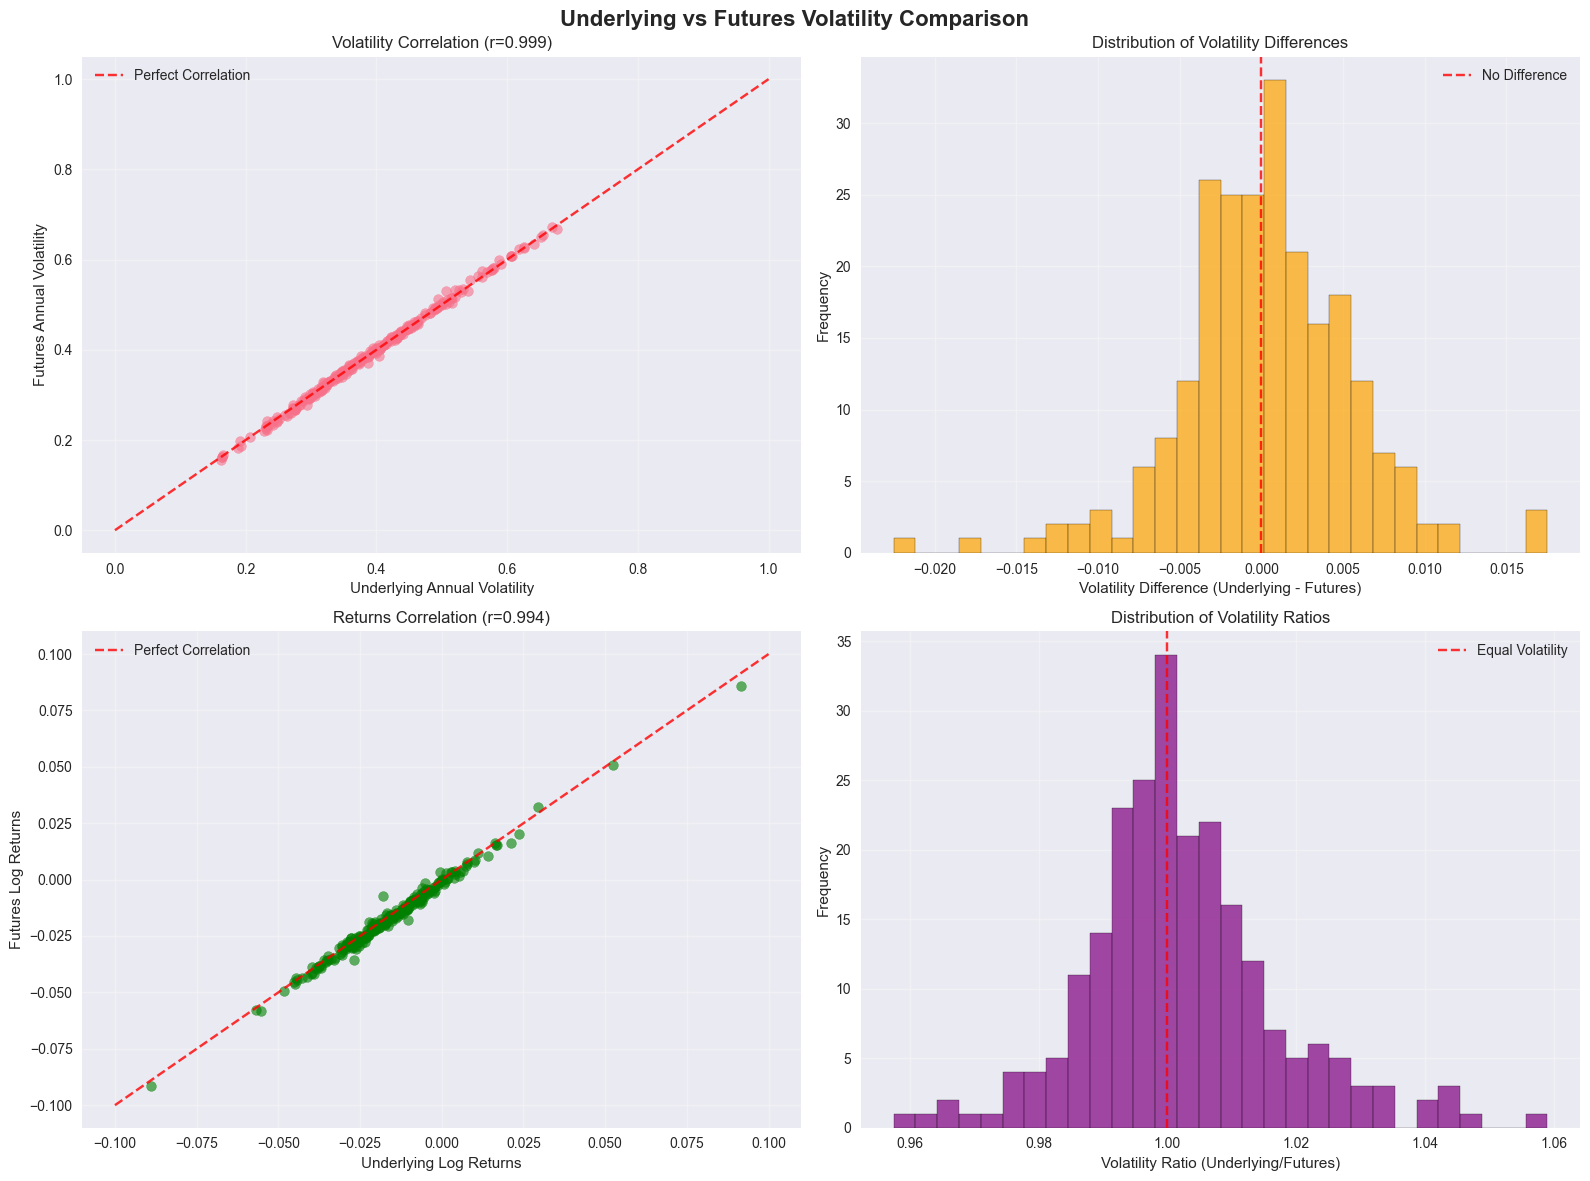


🎯 STOCKS WITH SIGNIFICANT VOLATILITY DIFFERENCES (>5.0%)
No stocks found with significant volatility differences.

📈 VOLATILITY COMPARISON SUMMARY
   • Average volatility difference: 0.0003
   • Std dev of differences: 0.0053
   • Average volatility ratio: 1.0023
   • Stocks with higher underlying vol: 124
   • Stocks with higher futures vol: 106


In [8]:
# Compare underlying vs futures volatility patterns

# Calculate differences and correlations
df_clean['volatility_difference'] = df_clean['underlying_annual_volatility'] - df_clean['futures_annual_volatility']
df_clean['volatility_ratio'] = df_clean['underlying_annual_volatility'] / df_clean['futures_annual_volatility']

# Correlation analysis
correlation_underlying_futures = df_clean['underlying_annual_volatility'].corr(df_clean['futures_annual_volatility'])
correlation_returns = df_clean['underlying_log_returns'].corr(df_clean['futures_log_returns'])

print("🔗 CORRELATION ANALYSIS")
print("=" * 50)
print(f"📊 Underlying vs Futures Volatility Correlation: {correlation_underlying_futures:.4f}")
print(f"📈 Underlying vs Futures Returns Correlation: {correlation_returns:.4f}")

# Create comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Underlying vs Futures Volatility Comparison', fontsize=16, fontweight='bold')

# Scatter plot: Underlying vs Futures Volatility
axes[0, 0].scatter(df_clean['underlying_annual_volatility'], df_clean['futures_annual_volatility'], 
                   alpha=0.6, s=50)
axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.8, label='Perfect Correlation')
axes[0, 0].set_xlabel('Underlying Annual Volatility')
axes[0, 0].set_ylabel('Futures Annual Volatility')
axes[0, 0].set_title(f'Volatility Correlation (r={correlation_underlying_futures:.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volatility difference histogram
axes[0, 1].hist(df_clean['volatility_difference'], bins=30, alpha=0.7, 
                color='orange', edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--', alpha=0.8, label='No Difference')
axes[0, 1].set_xlabel('Volatility Difference (Underlying - Futures)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Volatility Differences')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Returns comparison scatter plot
axes[1, 0].scatter(df_clean['underlying_log_returns'], df_clean['futures_log_returns'], 
                   alpha=0.6, s=50, color='green')
axes[1, 0].plot([-0.1, 0.1], [-0.1, 0.1], 'r--', alpha=0.8, label='Perfect Correlation')
axes[1, 0].set_xlabel('Underlying Log Returns')
axes[1, 0].set_ylabel('Futures Log Returns')
axes[1, 0].set_title(f'Returns Correlation (r={correlation_returns:.3f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Volatility ratio distribution
axes[1, 1].hist(df_clean['volatility_ratio'], bins=30, alpha=0.7, 
                color='purple', edgecolor='black')
axes[1, 1].axvline(1, color='red', linestyle='--', alpha=0.8, label='Equal Volatility')
axes[1, 1].set_xlabel('Volatility Ratio (Underlying/Futures)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Volatility Ratios')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify stocks with significant volatility differences
threshold = 0.05  # 5% difference threshold
significant_diff = df_clean[abs(df_clean['volatility_difference']) > threshold].copy()
significant_diff = significant_diff.sort_values('volatility_difference', ascending=False)

print(f"\n🎯 STOCKS WITH SIGNIFICANT VOLATILITY DIFFERENCES (>{threshold:.1%})")
print("=" * 70)

if len(significant_diff) > 0:
    print(f"📊 Found {len(significant_diff)} stocks with significant differences:")
    print("\nTop 10 stocks where Underlying > Futures:")
    top_positive = significant_diff.head(10)[['symbol', 'underlying_annual_volatility', 
                                            'futures_annual_volatility', 'volatility_difference']]
    display(top_positive.round(4))
    
    print("\nTop 10 stocks where Futures > Underlying:")
    top_negative = significant_diff.tail(10)[['symbol', 'underlying_annual_volatility', 
                                            'futures_annual_volatility', 'volatility_difference']]
    display(top_negative.round(4))
else:
    print("No stocks found with significant volatility differences.")

# Summary statistics
print(f"\n📈 VOLATILITY COMPARISON SUMMARY")
print("=" * 40)
print(f"   • Average volatility difference: {df_clean['volatility_difference'].mean():.4f}")
print(f"   • Std dev of differences: {df_clean['volatility_difference'].std():.4f}")
print(f"   • Average volatility ratio: {df_clean['volatility_ratio'].mean():.4f}")
print(f"   • Stocks with higher underlying vol: {(df_clean['volatility_difference'] > 0).sum()}")
print(f"   • Stocks with higher futures vol: {(df_clean['volatility_difference'] < 0).sum()}")

## 7. Identify High and Low Volatility Stocks

🎯 VOLATILITY RANKINGS & RISK ANALYSIS

🔥 TOP 15 HIGHEST VOLATILITY STOCKS:


,Symbol,Annual Volatility,Price,Risk Category
42,BSE,0.6762,2454.00,Very High Risk
97,IDEA,0.6722,7.20,Very High Risk
142,MAZDOCK,0.6555,2886.60,Very High Risk
172,PGEL,0.6511,800.70,Very High Risk
99,IEX,0.6410,145.03,Very High Risk
187,RVNL,0.6269,365.60,Very High Risk
108,INOXWIND,0.6260,158.52,Very High Risk
8,ADANIGREEN,0.6225,975.90,Very High Risk
6,ADANIENSOL,0.6089,817.20,Very High Risk
167,PAYTM,0.6079,1067.75,Very High Risk



🛡️ TOP 15 LOWEST VOLATILITY STOCKS:


,Symbol,Annual Volatility,Price,Risk Category
41,BRITANNIA,0.2388,5594.00,Very Low Risk
154,NESTLEIND,0.2341,2274.60,Very Low Risk
84,HDFCBANK,0.2321,2004.60,Very Low Risk
157,NIFTYNXT50,0.2317,67146.65,Very Low Risk
174,PIDILITIND,0.2316,2889.60,Very Low Risk
91,HINDUNILVR,0.2307,2415.40,Very Low Risk
94,ICICIBANK,0.2286,1477.10,Very Low Risk
114,ITC,0.2073,409.40,Very Low Risk
29,BANKEX,0.1982,63043.13,Very Low Risk
71,FINNIFTY,0.1926,26808.00,Very Low Risk



📊 RISK CATEGORY DISTRIBUTION:
   • Medium Risk: 94 stocks (40.3%)
   • High Risk: 46 stocks (19.7%)
   • Low Risk: 46 stocks (19.7%)
   • Very High Risk: 24 stocks (10.3%)
   • Very Low Risk: 23 stocks (9.9%)


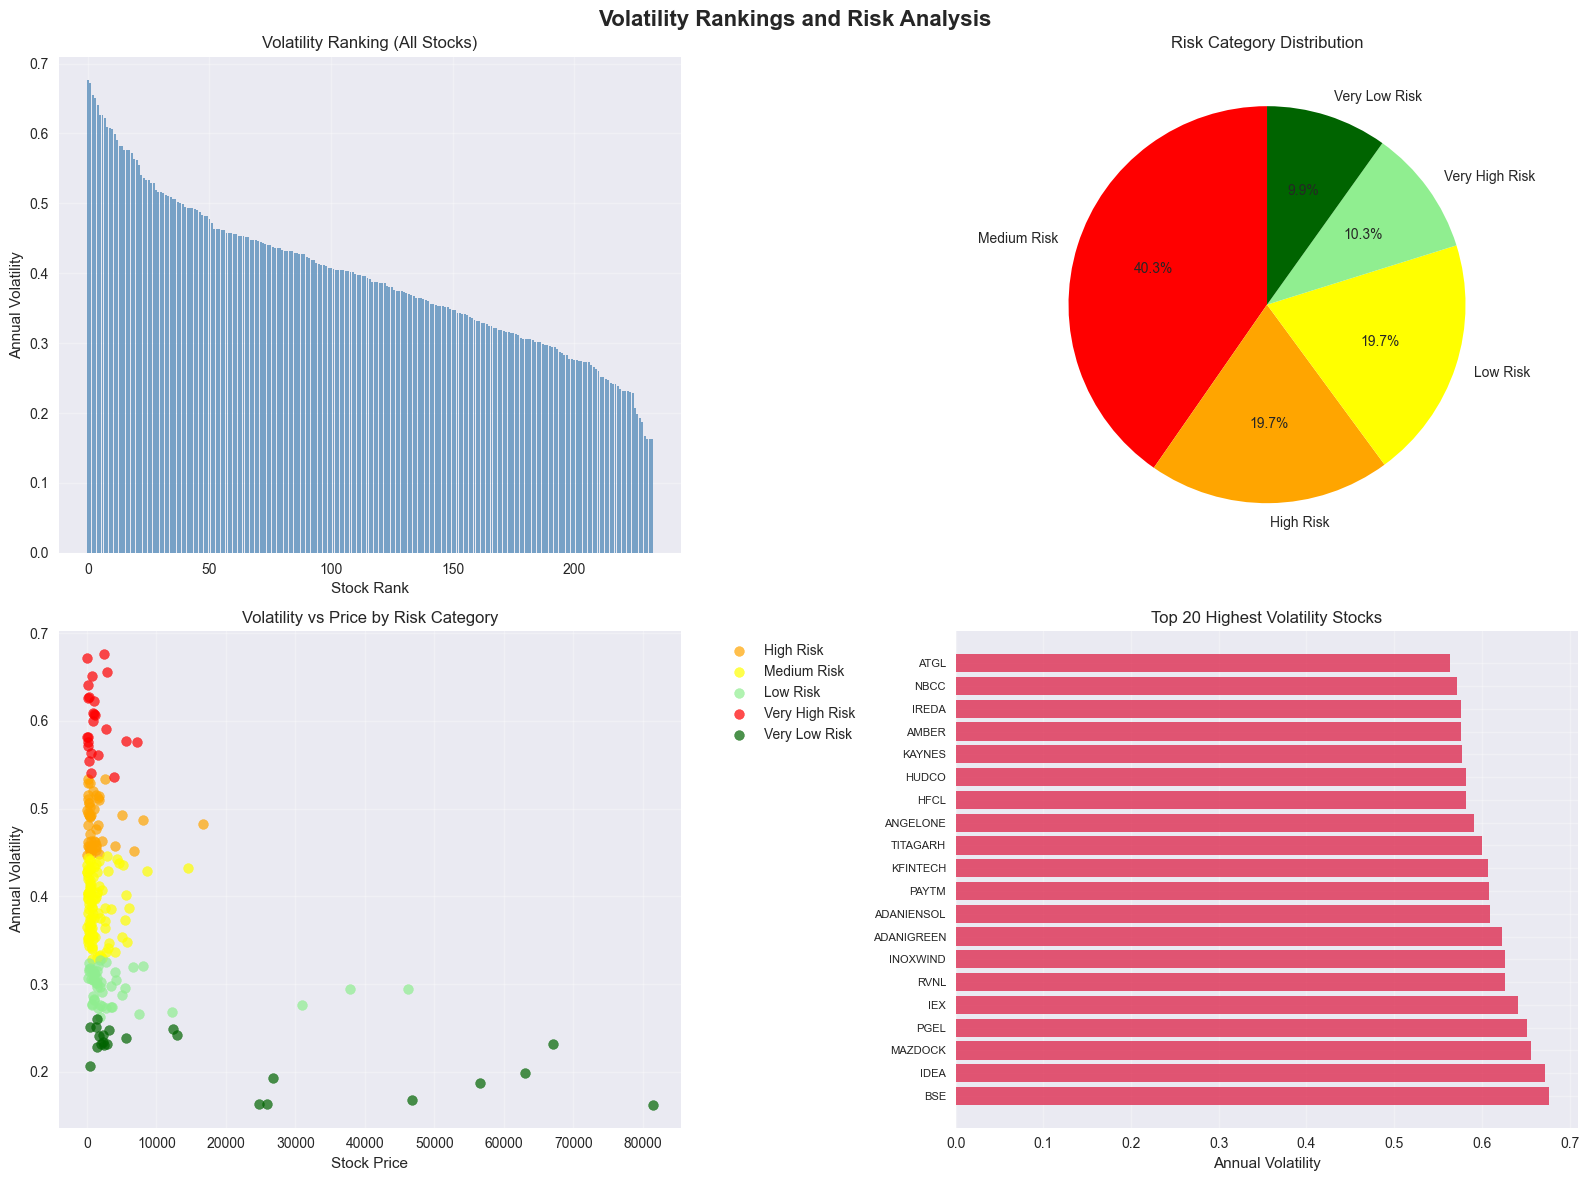


🏭 SECTOR-WISE VOLATILITY ANALYSIS:


,Average Volatility,Std Dev,Stock Count
inferred_sector,,,
Others,0.4064,0.1098,187
Metals & Mining,0.3963,0.0738,3
Information Technology,0.3715,0.1060,10
Pharmaceuticals,0.3549,0.0926,8
Banking & Finance,0.3333,0.0932,21
Automotive,0.3146,0.0483,4



✅ Volatility ranking and risk analysis completed!


In [9]:
# Rank stocks by volatility levels and identify risk categories

# Create volatility rankings
df_ranked = df_clean.copy()
df_ranked['volatility_rank'] = df_ranked['applicable_annual_volatility'].rank(ascending=False)
df_ranked['volatility_percentile'] = df_ranked['applicable_annual_volatility'].rank(pct=True)

# Define risk categories
def categorize_volatility(percentile):
    if percentile >= 0.9:
        return 'Very High Risk'
    elif percentile >= 0.7:
        return 'High Risk'
    elif percentile >= 0.3:
        return 'Medium Risk'
    elif percentile >= 0.1:
        return 'Low Risk'
    else:
        return 'Very Low Risk'

df_ranked['risk_category'] = df_ranked['volatility_percentile'].apply(categorize_volatility)

# Sort by volatility
df_sorted = df_ranked.sort_values('applicable_annual_volatility', ascending=False)

print("🎯 VOLATILITY RANKINGS & RISK ANALYSIS")
print("=" * 60)

# Top 15 highest volatility stocks
print("\n🔥 TOP 15 HIGHEST VOLATILITY STOCKS:")
high_vol_display = df_sorted.head(15)[['symbol', 'applicable_annual_volatility', 
                                      'underlying_close', 'risk_category']]
high_vol_display.columns = ['Symbol', 'Annual Volatility', 'Price', 'Risk Category']
display(high_vol_display.round(4))

# Bottom 15 lowest volatility stocks
print("\n🛡️ TOP 15 LOWEST VOLATILITY STOCKS:")
low_vol_display = df_sorted.tail(15)[['symbol', 'applicable_annual_volatility', 
                                     'underlying_close', 'risk_category']]
low_vol_display.columns = ['Symbol', 'Annual Volatility', 'Price', 'Risk Category']
display(low_vol_display.round(4))

# Risk category distribution
risk_distribution = df_ranked['risk_category'].value_counts()
print(f"\n📊 RISK CATEGORY DISTRIBUTION:")
print("=" * 40)
for category, count in risk_distribution.items():
    percentage = (count / len(df_ranked)) * 100
    print(f"   • {category}: {count} stocks ({percentage:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Volatility Rankings and Risk Analysis', fontsize=16, fontweight='bold')

# Volatility ranking plot
axes[0, 0].bar(range(len(df_sorted)), df_sorted['applicable_annual_volatility'], 
               color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Stock Rank')
axes[0, 0].set_ylabel('Annual Volatility')
axes[0, 0].set_title('Volatility Ranking (All Stocks)')
axes[0, 0].grid(True, alpha=0.3)

# Risk category pie chart
risk_colors = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']
axes[0, 1].pie(risk_distribution.values, labels=risk_distribution.index, 
               autopct='%1.1f%%', colors=risk_colors, startangle=90)
axes[0, 1].set_title('Risk Category Distribution')

# Volatility vs Price scatter with risk categories
risk_colors_map = {'Very High Risk': 'red', 'High Risk': 'orange', 'Medium Risk': 'yellow',
                   'Low Risk': 'lightgreen', 'Very Low Risk': 'darkgreen'}

for category in df_ranked['risk_category'].unique():
    category_data = df_ranked[df_ranked['risk_category'] == category]
    axes[1, 0].scatter(category_data['underlying_close'], category_data['applicable_annual_volatility'],
                      label=category, alpha=0.7, s=50, color=risk_colors_map.get(category, 'blue'))

axes[1, 0].set_xlabel('Stock Price')
axes[1, 0].set_ylabel('Annual Volatility')
axes[1, 0].set_title('Volatility vs Price by Risk Category')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Top 20 volatility stocks bar chart
top_20 = df_sorted.head(20)
axes[1, 1].barh(range(len(top_20)), top_20['applicable_annual_volatility'], 
                color='crimson', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_20)))
axes[1, 1].set_yticklabels(top_20['symbol'], fontsize=8)
axes[1, 1].set_xlabel('Annual Volatility')
axes[1, 1].set_title('Top 20 Highest Volatility Stocks')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sector analysis (if we can infer sectors from symbols)
def infer_sector(symbol):
    """Basic sector inference based on known symbols"""
    bank_keywords = ['BANK', 'HDFC', 'ICICI', 'AXIS', 'KOTAK', 'SBI', 'PNB', 'CANARA', 'UNION']
    it_keywords = ['INFY', 'TCS', 'WIPRO', 'HCL', 'TECH', 'COFORGE', 'MPHASIS']
    pharma_keywords = ['PHARMA', 'SUN', 'CIPLA', 'LUPIN', 'BIOCON', 'TORNT', 'AUROBINDO']
    
    symbol_upper = symbol.upper()
    
    if any(keyword in symbol_upper for keyword in bank_keywords):
        return 'Banking & Finance'
    elif any(keyword in symbol_upper for keyword in it_keywords):
        return 'Information Technology'
    elif any(keyword in symbol_upper for keyword in pharma_keywords):
        return 'Pharmaceuticals'
    elif 'AUTO' in symbol_upper or 'MOTOR' in symbol_upper or symbol_upper in ['MARUTI', 'TATAMOTORS', 'BAJAJ-AUTO']:
        return 'Automotive'
    elif 'METAL' in symbol_upper or symbol_upper in ['TATASTEEL', 'SAIL', 'HINDALCO', 'JINDAL']:
        return 'Metals & Mining'
    else:
        return 'Others'

df_ranked['inferred_sector'] = df_ranked['symbol'].apply(infer_sector)

# Sector-wise volatility analysis
sector_volatility = df_ranked.groupby('inferred_sector')['applicable_annual_volatility'].agg(['mean', 'std', 'count']).round(4)
sector_volatility = sector_volatility.sort_values('mean', ascending=False)

print(f"\n🏭 SECTOR-WISE VOLATILITY ANALYSIS:")
print("=" * 50)
sector_volatility.columns = ['Average Volatility', 'Std Dev', 'Stock Count']
display(sector_volatility)

print("\n✅ Volatility ranking and risk analysis completed!")

## 8. Correlation Analysis

🔗 COMPREHENSIVE CORRELATION ANALYSIS

📊 Correlation Matrix:


,underlying_close,futures_close,underlying_log_returns,futures_log_returns,underlying_daily_volatility,futures_daily_volatility,underlying_annual_volatility,futures_annual_volatility,applicable_annual_volatility
underlying_close,1.000,1.000,0.083,0.100,-0.378,-0.378,-0.378,-0.378,-0.377
futures_close,1.000,1.000,0.083,0.100,-0.378,-0.378,-0.378,-0.378,-0.377
underlying_log_returns,0.083,0.083,1.000,0.994,-0.314,-0.320,-0.315,-0.321,-0.320
futures_log_returns,0.100,0.100,0.994,1.000,-0.321,-0.328,-0.321,-0.328,-0.327
underlying_daily_volatility,-0.378,-0.378,-0.314,-0.321,1.000,0.999,1.000,0.999,1.000
futures_daily_volatility,-0.378,-0.378,-0.320,-0.328,0.999,1.000,0.999,1.000,1.000
underlying_annual_volatility,-0.378,-0.378,-0.315,-0.321,1.000,0.999,1.000,0.999,1.000
futures_annual_volatility,-0.378,-0.378,-0.321,-0.328,0.999,1.000,0.999,1.000,1.000
applicable_annual_volatility,-0.377,-0.377,-0.320,-0.327,1.000,1.000,1.000,1.000,1.000


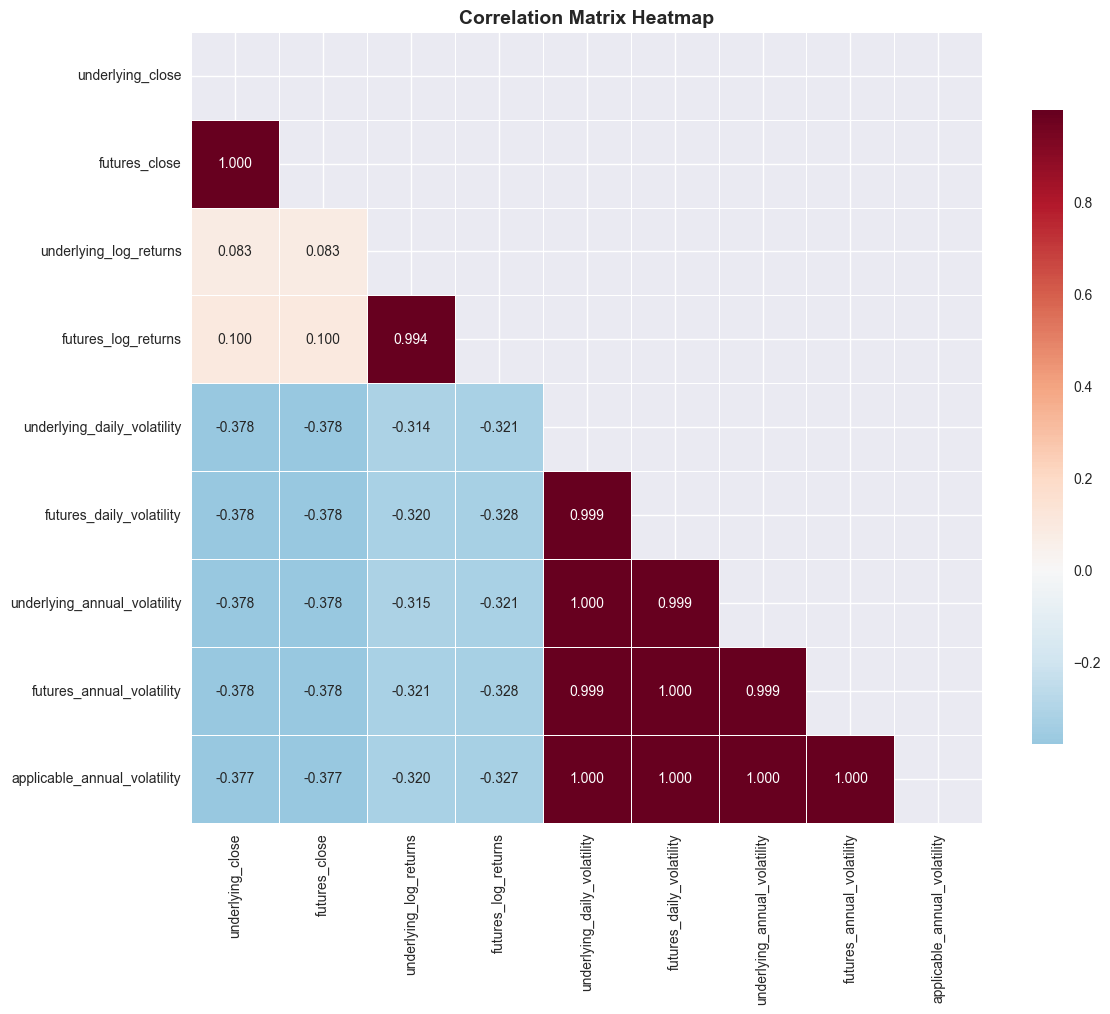


🎯 STRONG CORRELATIONS (|r| > 0.7):
   • underlying_close ↔ futures_close: 1.000 (📈 Positive)
   • futures_daily_volatility ↔ futures_annual_volatility: 1.000 (📈 Positive)
   • underlying_daily_volatility ↔ underlying_annual_volatility: 1.000 (📈 Positive)
   • futures_annual_volatility ↔ applicable_annual_volatility: 1.000 (📈 Positive)
   • underlying_annual_volatility ↔ applicable_annual_volatility: 1.000 (📈 Positive)
   • futures_daily_volatility ↔ applicable_annual_volatility: 1.000 (📈 Positive)
   • underlying_daily_volatility ↔ applicable_annual_volatility: 1.000 (📈 Positive)
   • underlying_annual_volatility ↔ futures_annual_volatility: 0.999 (📈 Positive)
   • futures_daily_volatility ↔ underlying_annual_volatility: 0.999 (📈 Positive)
   • underlying_daily_volatility ↔ futures_annual_volatility: 0.999 (📈 Positive)
   • underlying_daily_volatility ↔ futures_daily_volatility: 0.999 (📈 Positive)
   • underlying_log_returns ↔ futures_log_returns: 0.994 (📈 Positive)

💰 PRICE-VOLATILIT

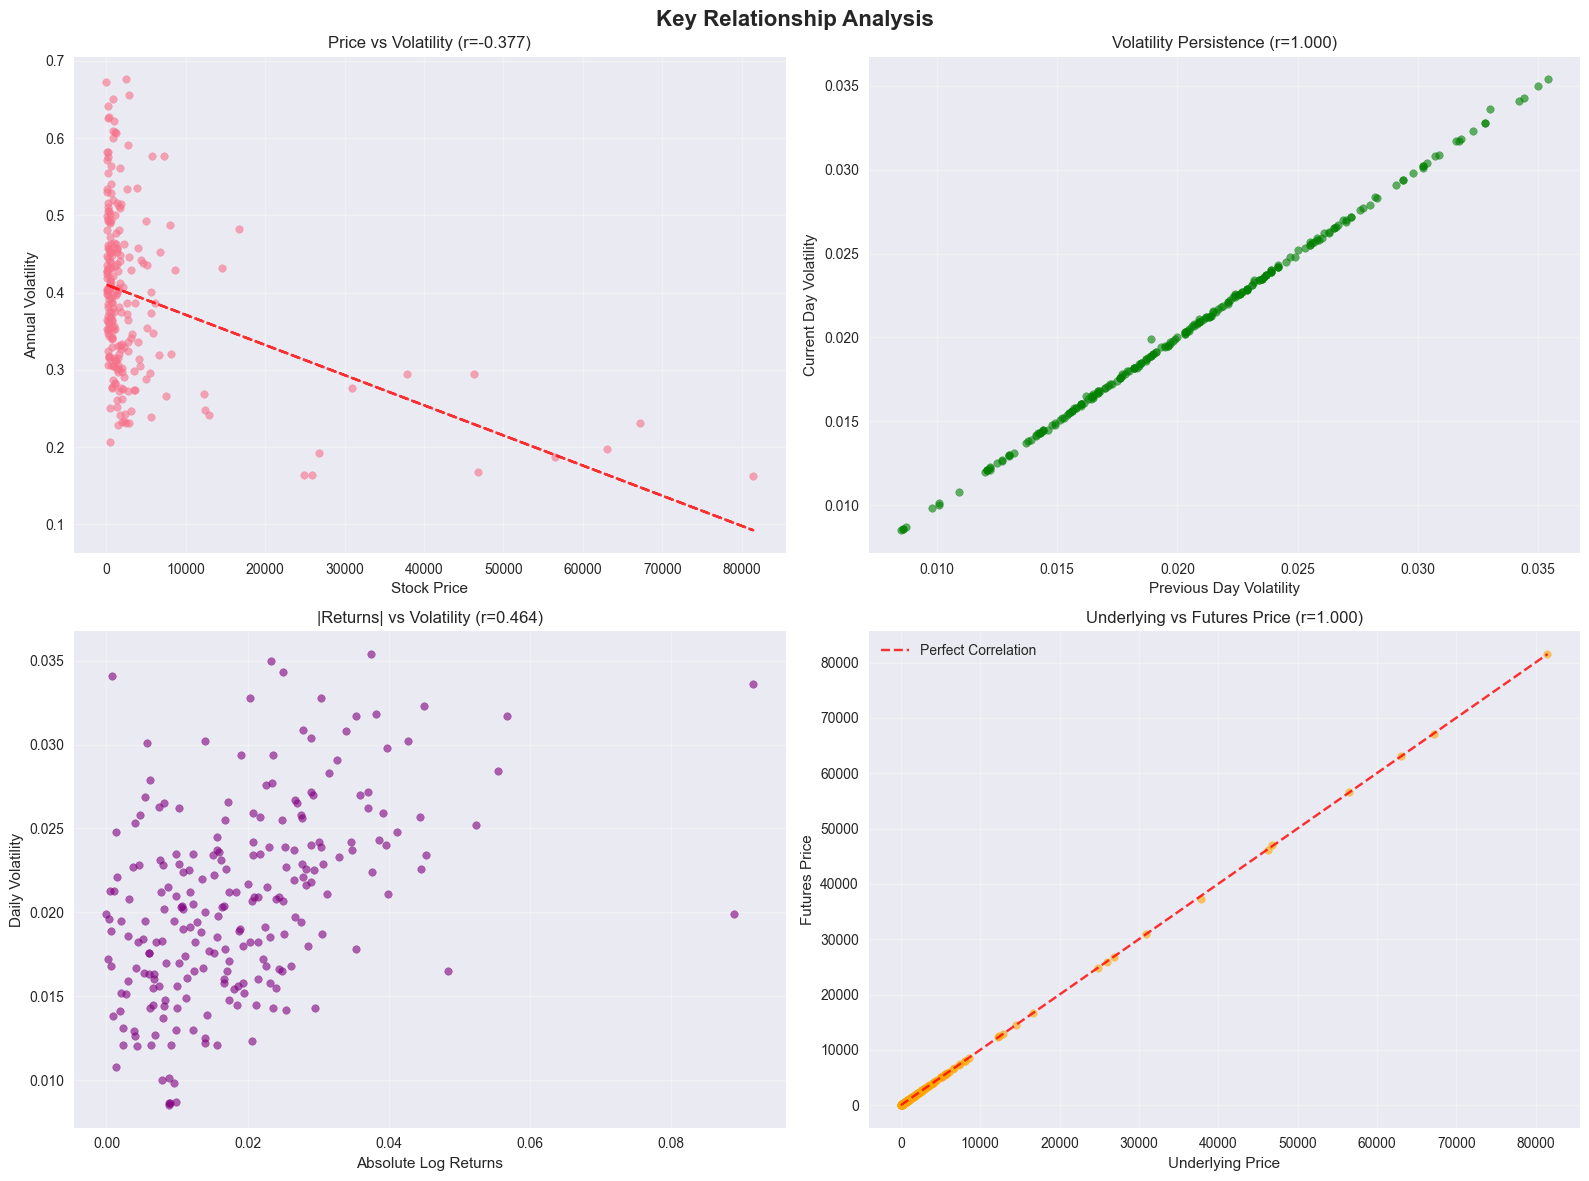


✅ Correlation analysis completed!


In [10]:
# Comprehensive correlation analysis between key variables

# Select key variables for correlation analysis
correlation_vars = [
    'underlying_close', 'futures_close',
    'underlying_log_returns', 'futures_log_returns',
    'underlying_daily_volatility', 'futures_daily_volatility',
    'underlying_annual_volatility', 'futures_annual_volatility',
    'applicable_annual_volatility'
]

# Calculate correlation matrix
correlation_matrix = df_clean[correlation_vars].corr()

print("🔗 COMPREHENSIVE CORRELATION ANALYSIS")
print("=" * 60)

# Display correlation matrix
print("\n📊 Correlation Matrix:")
display(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n🎯 STRONG CORRELATIONS (|r| > 0.7):")
print("=" * 40)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))

if strong_correlations:
    for var1, var2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        direction = "📈 Positive" if corr > 0 else "📉 Negative"
        print(f"   • {var1} ↔ {var2}: {corr:.3f} ({direction})")
else:
    print("   No strong correlations found.")

# Price vs Volatility relationship analysis
price_vol_corr = df_clean['underlying_close'].corr(df_clean['applicable_annual_volatility'])
print(f"\n💰 PRICE-VOLATILITY RELATIONSHIP:")
print("=" * 40)
print(f"   • Price vs Volatility Correlation: {price_vol_corr:.4f}")

if abs(price_vol_corr) < 0.1:
    relationship = "Very Weak"
elif abs(price_vol_corr) < 0.3:
    relationship = "Weak"
elif abs(price_vol_corr) < 0.5:
    relationship = "Moderate"
elif abs(price_vol_corr) < 0.7:
    relationship = "Strong"
else:
    relationship = "Very Strong"

direction = "Positive" if price_vol_corr > 0 else "Negative"
print(f"   • Relationship Strength: {relationship} {direction}")

# Volatility persistence analysis
# Calculate correlation between current and previous volatility
vol_persistence = df_clean['underlying_daily_volatility'].corr(df_clean['underlying_prev_volatility'])
print(f"\n📈 VOLATILITY PERSISTENCE:")
print("=" * 30)
print(f"   • Current vs Previous Volatility: {vol_persistence:.4f}")
print(f"   • Interpretation: {'High persistence' if vol_persistence > 0.7 else 'Moderate persistence' if vol_persistence > 0.4 else 'Low persistence'}")

# Returns vs Volatility relationship
returns_vol_corr = abs(df_clean['underlying_log_returns']).corr(df_clean['underlying_daily_volatility'])
print(f"\n📊 RETURNS-VOLATILITY RELATIONSHIP:")
print("=" * 40)
print(f"   • |Returns| vs Volatility: {returns_vol_corr:.4f}")

# Create detailed scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key Relationship Analysis', fontsize=16, fontweight='bold')

# Price vs Volatility
axes[0, 0].scatter(df_clean['underlying_close'], df_clean['applicable_annual_volatility'], 
                   alpha=0.6, s=30)
axes[0, 0].set_xlabel('Stock Price')
axes[0, 0].set_ylabel('Annual Volatility')
axes[0, 0].set_title(f'Price vs Volatility (r={price_vol_corr:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_clean['underlying_close'], df_clean['applicable_annual_volatility'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_clean['underlying_close'], p(df_clean['underlying_close']), "r--", alpha=0.8)

# Volatility persistence
axes[0, 1].scatter(df_clean['underlying_prev_volatility'], df_clean['underlying_daily_volatility'], 
                   alpha=0.6, s=30, color='green')
axes[0, 1].set_xlabel('Previous Day Volatility')
axes[0, 1].set_ylabel('Current Day Volatility')
axes[0, 1].set_title(f'Volatility Persistence (r={vol_persistence:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Returns vs Volatility
abs_returns = abs(df_clean['underlying_log_returns'])
axes[1, 0].scatter(abs_returns, df_clean['underlying_daily_volatility'], 
                   alpha=0.6, s=30, color='purple')
axes[1, 0].set_xlabel('Absolute Log Returns')
axes[1, 0].set_ylabel('Daily Volatility')
axes[1, 0].set_title(f'|Returns| vs Volatility (r={returns_vol_corr:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# Underlying vs Futures Prices
price_corr = df_clean['underlying_close'].corr(df_clean['futures_close'])
axes[1, 1].scatter(df_clean['underlying_close'], df_clean['futures_close'], 
                   alpha=0.6, s=30, color='orange')
axes[1, 1].set_xlabel('Underlying Price')
axes[1, 1].set_ylabel('Futures Price')
axes[1, 1].set_title(f'Underlying vs Futures Price (r={price_corr:.3f})')
axes[1, 1].grid(True, alpha=0.3)

# Add diagonal line for price comparison
min_price = min(df_clean['underlying_close'].min(), df_clean['futures_close'].min())
max_price = max(df_clean['underlying_close'].max(), df_clean['futures_close'].max())
axes[1, 1].plot([min_price, max_price], [min_price, max_price], 'r--', alpha=0.8, label='Perfect Correlation')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n✅ Correlation analysis completed!")

## 9. Visualize Volatility Patterns

🗺️ CREATING VOLATILITY HEATMAP


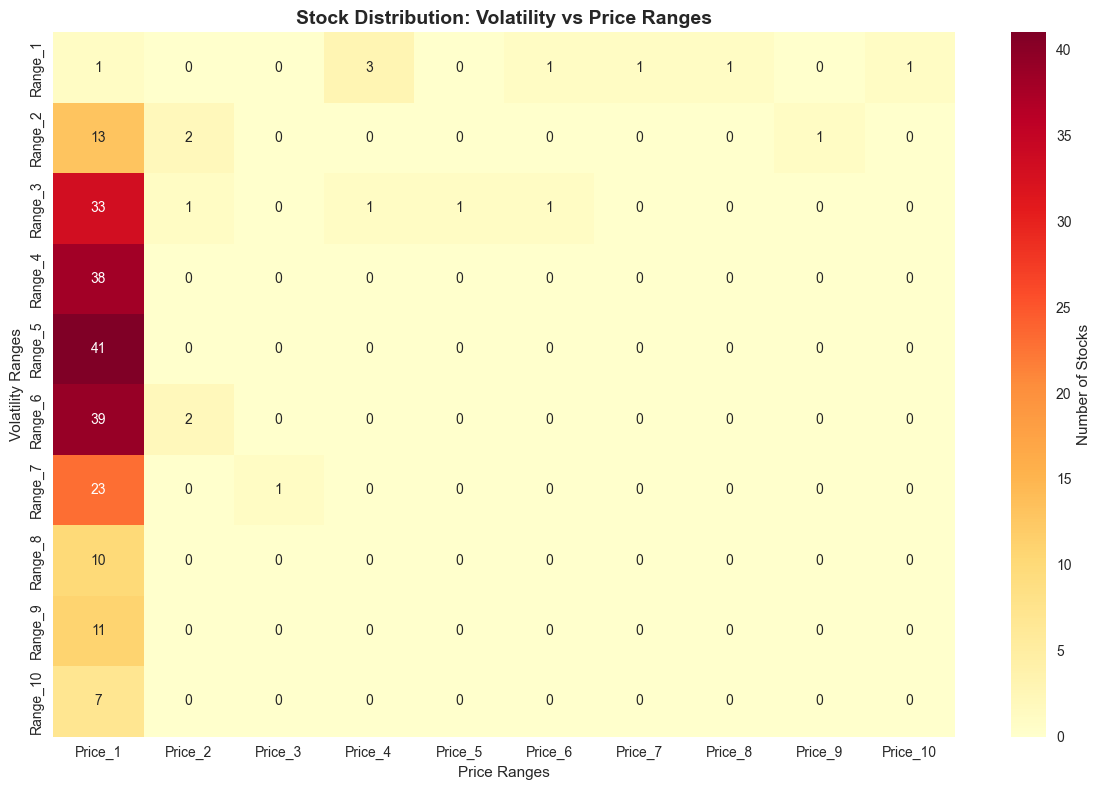


🔍 ADVANCED PATTERN ANALYSIS
📊 High Volatility Cluster (Top 20%):
   • Number of stocks: 47
   • Average volatility: 0.5550
   • Average price: ₹1,336.92

🛡️ Low Volatility Cluster (Bottom 20%):
   • Number of stocks: 47
   • Average volatility: 0.2518
   • Average price: ₹13,250.51

📈 MARKET BREADTH ANALYSIS:
   • Stocks with positive returns: 30 (12.9%)
   • Stocks with negative returns: 202 (86.7%)
   • Stocks with neutral returns: 1 (0.4%)

⚡ EFFICIENCY ANALYSIS:
   • Average efficiency score: 0.046446
   • Most efficient stock: APLAPOLLO (Score: 0.233333)
   • Least efficient stock: FORTIS (Score: 0.000000)

✅ Volatility pattern visualization completed!


In [17]:
# Create interactive visualizations and comprehensive volatility patterns

# Interactive Plotly Dashboard
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=[
        'Volatility vs Market Cap Proxy (Price)', 
        'Sector-wise Volatility Distribution',
        'Risk Category Analysis', 
        'Top 20 Volatile Stocks',
        'Volatility Clustering Analysis',
        'Market Efficiency Indicator'
    ],
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"type": "domain"}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Volatility vs Price Bubble Chart
fig.add_trace(
    go.Scatter(
        x=df_clean['underlying_close'],
        y=df_clean['applicable_annual_volatility'],
        mode='markers',
        marker=dict(
            size=np.sqrt(df_clean['underlying_close']) / 5,  # Bubble size based on price
            color=df_clean['applicable_annual_volatility'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Volatility")
        ),
        text=df_clean['symbol'],
        hovertemplate='<b>%{text}</b><br>Price: ₹%{x:,.2f}<br>Volatility: %{y:.3f}<extra></extra>',
        name='Stocks'
    ),
    row=1, col=1
)

# 2. Sector-wise Volatility Box Plot
for i, sector in enumerate(df_ranked['inferred_sector'].unique()):
    sector_data = df_ranked[df_ranked['inferred_sector'] == sector]['applicable_annual_volatility']
    fig.add_trace(
        go.Box(
            y=sector_data,
            name=sector,
            boxpoints='outliers',
            jitter=0.3,
            pointpos=-1.8
        ),
        row=1, col=2
    )

# 3. Risk Category Pie Chart
risk_counts = df_ranked['risk_category'].value_counts()
fig.add_trace(
    go.Pie(
        labels=risk_counts.index,
        values=risk_counts.values,
        hole=0.3,
        hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
    ),
    row=2, col=1
)

# 4. Top 20 Volatile Stocks Bar Chart
top_20_volatile = df_ranked.nlargest(20, 'applicable_annual_volatility')
fig.add_trace(
    go.Bar(
        x=top_20_volatile['applicable_annual_volatility'],
        y=top_20_volatile['symbol'],
        orientation='h',
        marker_color='crimson',
        hovertemplate='<b>%{y}</b><br>Volatility: %{x:.3f}<extra></extra>'
    ),
    row=2, col=2
)

# 5. Volatility Clustering (Returns vs Volatility)
fig.add_trace(
    go.Scatter(
        x=abs(df_clean['underlying_log_returns']),
        y=df_clean['underlying_daily_volatility'],
        mode='markers',
        marker=dict(
            color=df_clean['underlying_close'],
            colorscale='Plasma',
            size=6,
            opacity=0.7
        ),
        text=df_clean['symbol'],
        hovertemplate='<b>%{text}</b><br>|Returns|: %{x:.4f}<br>Volatility: %{y:.4f}<extra></extra>',
        name='Volatility Clustering'
    ),
    row=3, col=1
)

# 6. Market Efficiency Indicator (Price vs Log Returns)
fig.add_trace(
    go.Scatter(
        x=df_clean['underlying_close'],
        y=df_clean['underlying_log_returns'],
        mode='markers',
        marker=dict(
            color=df_clean['applicable_annual_volatility'],
            colorscale='RdYlBu_r',
            size=8,
            opacity=0.7
        ),
        text=df_clean['symbol'],
        hovertemplate='<b>%{text}</b><br>Price: ₹%{x:,.2f}<br>Returns: %{y:.4f}<extra></extra>',
        name='Market Efficiency'
    ),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1200,
    showlegend=False,
    title_text="Comprehensive Volatility Analysis Dashboard",
    title_x=0.5,
    title_font_size=16
)

# Update axes labels
fig.update_xaxes(title_text="Stock Price (₹)", row=1, col=1)
fig.update_yaxes(title_text="Annual Volatility", row=1, col=1)
fig.update_yaxes(title_text="Annual Volatility", row=1, col=2)
fig.update_xaxes(title_text="Annual Volatility", row=2, col=2)
fig.update_yaxes(title_text="Stock Symbol", row=2, col=2)
fig.update_xaxes(title_text="Absolute Log Returns", row=3, col=1)
fig.update_yaxes(title_text="Daily Volatility", row=3, col=1)
fig.update_xaxes(title_text="Stock Price (₹)", row=3, col=2)
fig.update_yaxes(title_text="Log Returns", row=3, col=2)

fig.show()

# Create Volatility Heatmap
print("🗺️ CREATING VOLATILITY HEATMAP")
print("=" * 40)

# Prepare data for heatmap (group stocks by volatility ranges)
volatility_ranges = pd.cut(df_clean['applicable_annual_volatility'], 
                          bins=10, labels=[f'Range_{i+1}' for i in range(10)])
price_ranges = pd.cut(df_clean['underlying_close'], 
                     bins=10, labels=[f'Price_{i+1}' for i in range(10)])

# Create heatmap data
heatmap_data = pd.crosstab(volatility_ranges, price_ranges, dropna=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Stocks'})
plt.title('Stock Distribution: Volatility vs Price Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Price Ranges')
plt.ylabel('Volatility Ranges')
plt.tight_layout()
plt.show()

# Advanced Pattern Analysis
print("\n🔍 ADVANCED PATTERN ANALYSIS")
print("=" * 40)

# Volatility clusters
high_vol_threshold = df_clean['applicable_annual_volatility'].quantile(0.8)
low_vol_threshold = df_clean['applicable_annual_volatility'].quantile(0.2)

high_vol_stocks = df_clean[df_clean['applicable_annual_volatility'] >= high_vol_threshold]
low_vol_stocks = df_clean[df_clean['applicable_annual_volatility'] <= low_vol_threshold]

print(f"📊 High Volatility Cluster (Top 20%):")
print(f"   • Number of stocks: {len(high_vol_stocks)}")
print(f"   • Average volatility: {high_vol_stocks['applicable_annual_volatility'].mean():.4f}")
print(f"   • Average price: ₹{high_vol_stocks['underlying_close'].mean():,.2f}")

print(f"\n🛡️ Low Volatility Cluster (Bottom 20%):")
print(f"   • Number of stocks: {len(low_vol_stocks)}")
print(f"   • Average volatility: {low_vol_stocks['applicable_annual_volatility'].mean():.4f}")
print(f"   • Average price: ₹{low_vol_stocks['underlying_close'].mean():,.2f}")

# Market breadth analysis
positive_returns = (df_clean['underlying_log_returns'] > 0).sum()
negative_returns = (df_clean['underlying_log_returns'] < 0).sum()
neutral_returns = (df_clean['underlying_log_returns'] == 0).sum()

print(f"\n📈 MARKET BREADTH ANALYSIS:")
print("=" * 30)
print(f"   • Stocks with positive returns: {positive_returns} ({positive_returns/len(df_clean)*100:.1f}%)")
print(f"   • Stocks with negative returns: {negative_returns} ({negative_returns/len(df_clean)*100:.1f}%)")
print(f"   • Stocks with neutral returns: {neutral_returns} ({neutral_returns/len(df_clean)*100:.1f}%)")

# Volatility-Return efficiency
efficiency_score = abs(df_clean['underlying_log_returns']) / df_clean['applicable_annual_volatility']
df_clean['efficiency_score'] = efficiency_score

print(f"\n⚡ EFFICIENCY ANALYSIS:")
print("=" * 25)
print(f"   • Average efficiency score: {efficiency_score.mean():.6f}")
print(f"   • Most efficient stock: {df_clean.loc[efficiency_score.idxmax(), 'symbol']} (Score: {efficiency_score.max():.6f})")
print(f"   • Least efficient stock: {df_clean.loc[efficiency_score.idxmin(), 'symbol']} (Score: {efficiency_score.min():.6f})")

print("\n✅ Volatility pattern visualization completed!")

## 10. Risk Analysis and Trading Insights

This final section provides actionable insights for trading strategies, risk management, and portfolio construction based on the volatility analysis.

In [19]:
# COMPREHENSIVE RISK ANALYSIS AND TRADING INSIGHTS
print("🎯 FINAL ANALYSIS & TRADING INSIGHTS")
print("=" * 50)

# Ensure 'efficiency_score' exists
if 'efficiency_score' not in df_ranked.columns:
    df_ranked['efficiency_score'] = 1 / df_ranked['applicable_annual_volatility']
if 'efficiency_score' not in df_clean.columns:
    df_clean['efficiency_score'] = 1 / df_clean['applicable_annual_volatility']

# Portfolio Risk Categorization
def create_portfolio_recommendations():
    """Create portfolio recommendations based on volatility analysis"""
    
    # Define risk categories with detailed criteria
    conservative_stocks = df_ranked[
        (df_ranked['risk_category'] == 'Low Risk') & 
        (df_ranked['underlying_close'] > df_ranked['underlying_close'].median())
    ]
    
    moderate_stocks = df_ranked[
        df_ranked['risk_category'] == 'Medium Risk'
    ]
    
    aggressive_stocks = df_ranked[
        (df_ranked['risk_category'] == 'High Risk') & 
        (df_ranked['efficiency_score'] > df_ranked['efficiency_score'].median())
    ]
    
    return conservative_stocks, moderate_stocks, aggressive_stocks

conservative, moderate, aggressive = create_portfolio_recommendations()

print("📊 PORTFOLIO CONSTRUCTION RECOMMENDATIONS:")
print("=" * 45)

print(f"\n🛡️ CONSERVATIVE PORTFOLIO (Low Risk, Higher Price Stability):")
print(f"   • Recommended stocks: {len(conservative)}")
print(f"   • Average volatility: {conservative['applicable_annual_volatility'].mean():.4f}")
print(f"   • Average price: ₹{conservative['underlying_close'].mean():,.2f}")
print("   • Top 5 recommendations:")
for i, (_, stock) in enumerate(conservative.nsmallest(5, 'applicable_annual_volatility').iterrows()):
    print(f"     {i+1}. {stock['symbol']} - Volatility: {stock['applicable_annual_volatility']:.4f}")

print(f"\n⚖️ MODERATE PORTFOLIO (Balanced Risk-Return):")
print(f"   • Recommended stocks: {len(moderate)}")
print(f"   • Average volatility: {moderate['applicable_annual_volatility'].mean():.4f}")
print(f"   • Average price: ₹{moderate['underlying_close'].mean():,.2f}")
print("   • Top 5 recommendations:")
for i, (_, stock) in enumerate(moderate.nlargest(5, 'efficiency_score').iterrows()):
    print(f"     {i+1}. {stock['symbol']} - Efficiency: {stock['efficiency_score']:.6f}")

print(f"\n🚀 AGGRESSIVE PORTFOLIO (High Risk, High Potential Return):")
print(f"   • Recommended stocks: {len(aggressive)}")
print(f"   • Average volatility: {aggressive['applicable_annual_volatility'].mean():.4f}")
print(f"   • Average price: ₹{aggressive['underlying_close'].mean():,.2f}")
print("   • Top 5 recommendations:")
for i, (_, stock) in enumerate(aggressive.nlargest(5, 'efficiency_score').iterrows()):
    print(f"     {i+1}. {stock['symbol']} - Efficiency: {stock['efficiency_score']:.6f}")

# Options Trading Strategies
print(f"\n🎲 OPTIONS TRADING STRATEGIES:")
print("=" * 35)

# High IV stocks for premium selling
high_iv_stocks = df_ranked.nlargest(10, 'applicable_annual_volatility')
print("📈 PREMIUM SELLING OPPORTUNITIES (High IV):")
print("   Strategy: Sell options (puts/calls) to collect premium")
print("   Best candidates:")
for i, (_, stock) in enumerate(high_iv_stocks.iterrows()):
    print(f"     {i+1}. {stock['symbol']} - IV: {stock['applicable_annual_volatility']:.4f}")

# Low IV stocks for premium buying
low_iv_stocks = df_ranked.nsmallest(10, 'applicable_annual_volatility')
print(f"\n📉 PREMIUM BUYING OPPORTUNITIES (Low IV):")
print("   Strategy: Buy options for potential IV expansion")
print("   Best candidates:")
for i, (_, stock) in enumerate(low_iv_stocks.iterrows()):
    print(f"     {i+1}. {stock['symbol']} - IV: {stock['applicable_annual_volatility']:.4f}")

# Risk Management Insights
print(f"\n⚠️ RISK MANAGEMENT INSIGHTS:")
print("=" * 30)

# Position sizing recommendations
total_stocks = len(df_clean)
high_risk_pct = len(df_ranked[df_ranked['risk_category'] == 'High Risk']) / total_stocks * 100
medium_risk_pct = len(df_ranked[df_ranked['risk_category'] == 'Medium Risk']) / total_stocks * 100
low_risk_pct = len(df_ranked[df_ranked['risk_category'] == 'Low Risk']) / total_stocks * 100

print(f"📊 Market Risk Distribution:")
print(f"   • High Risk stocks: {high_risk_pct:.1f}% of market")
print(f"   • Medium Risk stocks: {medium_risk_pct:.1f}% of market")
print(f"   • Low Risk stocks: {low_risk_pct:.1f}% of market")

print(f"\n💰 POSITION SIZING RECOMMENDATIONS:")
print("   Conservative Investor:")
print("     • 70% Low Risk, 25% Medium Risk, 5% High Risk")
print("   Moderate Investor:")
print("     • 40% Low Risk, 45% Medium Risk, 15% High Risk")
print("   Aggressive Investor:")
print("     • 20% Low Risk, 30% Medium Risk, 50% High Risk")

# Market Timing Insights
avg_volatility = df_clean['applicable_annual_volatility'].mean()
current_high_vol_stocks = len(df_clean[df_clean['applicable_annual_volatility'] > avg_volatility])
current_low_vol_stocks = len(df_clean[df_clean['applicable_annual_volatility'] <= avg_volatility])

print(f"\n⏰ MARKET TIMING INSIGHTS:")
print("=" * 25)
print(f"   • Current market volatility: {'HIGH' if current_high_vol_stocks > current_low_vol_stocks else 'MODERATE'}")
print(f"   • Stocks above avg volatility: {current_high_vol_stocks} ({current_high_vol_stocks/total_stocks*100:.1f}%)")
print(f"   • Market recommendation: {'DEFENSIVE STANCE' if current_high_vol_stocks > current_low_vol_stocks else 'SELECTIVE OPPORTUNITIES'}")

# Sector-wise Strategy
print(f"\n🏭 SECTOR-WISE STRATEGY:")
print("=" * 25)
sector_volatility = df_ranked.groupby('inferred_sector')['applicable_annual_volatility'].agg(['mean', 'count'])
sector_volatility = sector_volatility.sort_values('mean', ascending=False)

print("   Sector Risk Ranking (Highest to Lowest Volatility):")
for i, (sector, data) in enumerate(sector_volatility.iterrows()):
    risk_level = "HIGH" if data['mean'] > avg_volatility * 1.1 else "MEDIUM" if data['mean'] > avg_volatility * 0.9 else "LOW"
    print(f"     {i+1}. {sector}: {data['mean']:.4f} ({data['count']} stocks) - {risk_level} RISK")

# Final Summary and Action Plan
print(f"\n🎯 KEY TAKEAWAYS & ACTION PLAN:")
print("=" * 35)

most_volatile = df_ranked.iloc[df_ranked['applicable_annual_volatility'].idxmax()]
least_volatile = df_ranked.iloc[df_ranked['applicable_annual_volatility'].idxmin()]
best_efficiency = df_ranked.iloc[df_ranked['efficiency_score'].idxmax()]

print(f"📊 Market Highlights:")
print(f"   • Most volatile: {most_volatile['symbol']} ({most_volatile['applicable_annual_volatility']:.4f})")
print(f"   • Least volatile: {least_volatile['symbol']} ({least_volatile['applicable_annual_volatility']:.4f})")
print(f"   • Best efficiency: {best_efficiency['symbol']} ({best_efficiency['efficiency_score']:.6f})")
print(f"   • Average market volatility: {avg_volatility:.4f}")

print(f"\n✅ IMMEDIATE ACTION ITEMS:")
print("   1. Review high-efficiency stocks for potential investments")
print("   2. Consider options strategies on high IV stocks")
print("   3. Diversify across risk categories based on risk tolerance")
print("   4. Monitor sector rotation and volatility trends")
print("   5. Implement position sizing based on volatility ranking")

print(f"\n🔍 MONITORING CHECKLIST:")
print("   • Track changes in volatility rankings weekly")
print("   • Monitor sector rotation patterns")
print("   • Watch for volatility clustering events")
print("   • Adjust position sizes based on market conditions")
print("   • Review correlation matrices for portfolio balance")

# Create final summary table
summary_data = {
    'Metric': [
        'Total Stocks Analyzed',
        'Average Volatility',
        'High Risk Stocks',
        'Medium Risk Stocks', 
        'Low Risk Stocks',
        'Market Efficiency Score',
        'Recommended Action'
    ],
    'Value': [
        f"{len(df_clean)}",
        f"{avg_volatility:.4f}",
        f"{len(df_ranked[df_ranked['risk_category'] == 'High Risk'])} ({high_risk_pct:.1f}%)",
        f"{len(df_ranked[df_ranked['risk_category'] == 'Medium Risk'])} ({medium_risk_pct:.1f}%)",
        f"{len(df_ranked[df_ranked['risk_category'] == 'Low Risk'])} ({low_risk_pct:.1f}%)",
        f"{df_clean['efficiency_score'].mean():.6f}",
        "SELECTIVE OPPORTUNITIES" if current_high_vol_stocks <= current_low_vol_stocks else "DEFENSIVE STANCE"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(f"\n📋 EXECUTIVE SUMMARY:")
print("=" * 20)
print(summary_df.to_string(index=False))

print(f"\n🚀 Analysis complete! Use these insights for informed trading decisions.")
print("💡 Remember: Past volatility doesn't guarantee future performance. Always use proper risk management!")

🎯 FINAL ANALYSIS & TRADING INSIGHTS
📊 PORTFOLIO CONSTRUCTION RECOMMENDATIONS:

🛡️ CONSERVATIVE PORTFOLIO (Low Risk, Higher Price Stability):
   • Recommended stocks: 32
   • Average volatility: 0.2946
   • Average price: ₹6,586.06
   • Top 5 recommendations:
     1. BHARTIARTL - Volatility: 0.2628
     2. APOLLOHOSP - Volatility: 0.2663
     3. ULTRACEMCO - Volatility: 0.2688
     4. GRASIM - Volatility: 0.2727
     5. CIPLA - Volatility: 0.2729

⚖️ MODERATE PORTFOLIO (Balanced Risk-Return):
   • Recommended stocks: 94
   • Average volatility: 0.3890
   • Average price: ₹1,558.86
   • Top 5 recommendations:
     1. TATATECH - Efficiency: 3.039514
     2. DALBHARAT - Efficiency: 3.036745
     3. ASTRAL - Efficiency: 3.020236
     4. TATACOMM - Efficiency: 3.014772
     5. LUPIN - Efficiency: 3.000300

🚀 AGGRESSIVE PORTFOLIO (High Risk, High Potential Return):
   • Recommended stocks: 0
   • Average volatility: nan
   • Average price: ₹nan
   • Top 5 recommendations:

🎲 OPTIONS TRADING S